# import packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
churn_data=pd.read_csv("Telco-Customer-Churn.csv")

In [7]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
churn_data.shape

(7043, 21)

In [9]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
#cols_index=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','y']

In [12]:
#cols_index

In [13]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
churn_data["SeniorCitizen"]= churn_data["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [14]:
numerical_col=churn_data.select_dtypes(include=np.number).columns
print("numerical columns: \n",numerical_col)

categorical_col=churn_data.select_dtypes(exclude=np.number).columns
print("categorical columns: \n",categorical_col)

numerical columns: 
 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
categorical columns: 
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')


In [15]:
churn_data.drop('customerID',axis=1,inplace=True)

In [16]:
numerical_data=churn_data[['TotalCharges','MonthlyCharges','tenure']]

In [17]:
numerical_data['TotalCharges'].isnull().sum()

11

In [18]:
numerical_data['tenure'].isin([0]).sum()

11

In [19]:
churn_data.loc[:,'TotalCharges'] = churn_data.loc[:,'TotalCharges'].replace(np.nan,0)
churn_data['TotalCharges'].isnull().sum()

0

In [20]:
for columns in churn_data.select_dtypes('object').columns:
    print(columns,": \n")
    print(churn_data[columns].value_counts(),"\n")

gender : 

Male      3555
Female    3488
Name: gender, dtype: int64 

SeniorCitizen : 

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64 

Partner : 

No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents : 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService : 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines : 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService : 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity : 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup : 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

DeviceProtection : 

No                     3095
Yes                    2422
No internet service    1526
Name: Devi

In [21]:
churn_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [22]:
demographic_features=["gender","SeniorCitizen","Partner","Dependents"]
services_features=["PhoneService","MultipleLines","InternetService","OnlineSecurity",
                   "OnlineBackup","TechSupport","StreamingTV","StreamingMovies","DeviceProtection"]
paymentmethod_Accountinfo=["Contract","PaperlessBilling","PaymentMethod"]
Numerical_Accountinfo=["tenure","MonthlyCharges","TotalCharges"]
churn=["Churn"]

In [23]:
churn_data=churn_data.replace(to_replace={'Churn':{'Yes':1,'No':0}})

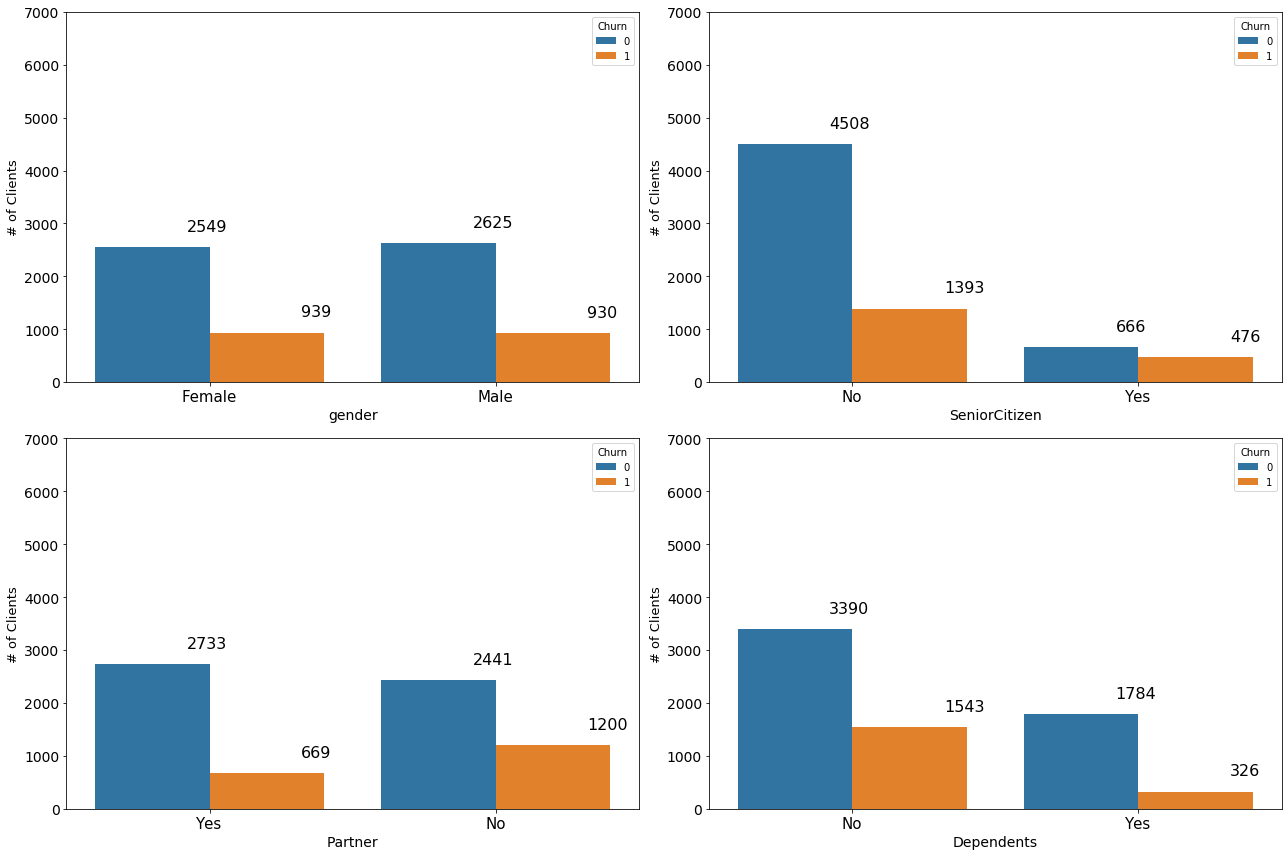

In [24]:
plt.figure(figsize=(18,12))

for i,col in enumerate(demographic_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(x=col,hue="Churn",data=churn_data)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 16)

plt.tight_layout()


In [25]:
services_features

['PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'DeviceProtection']

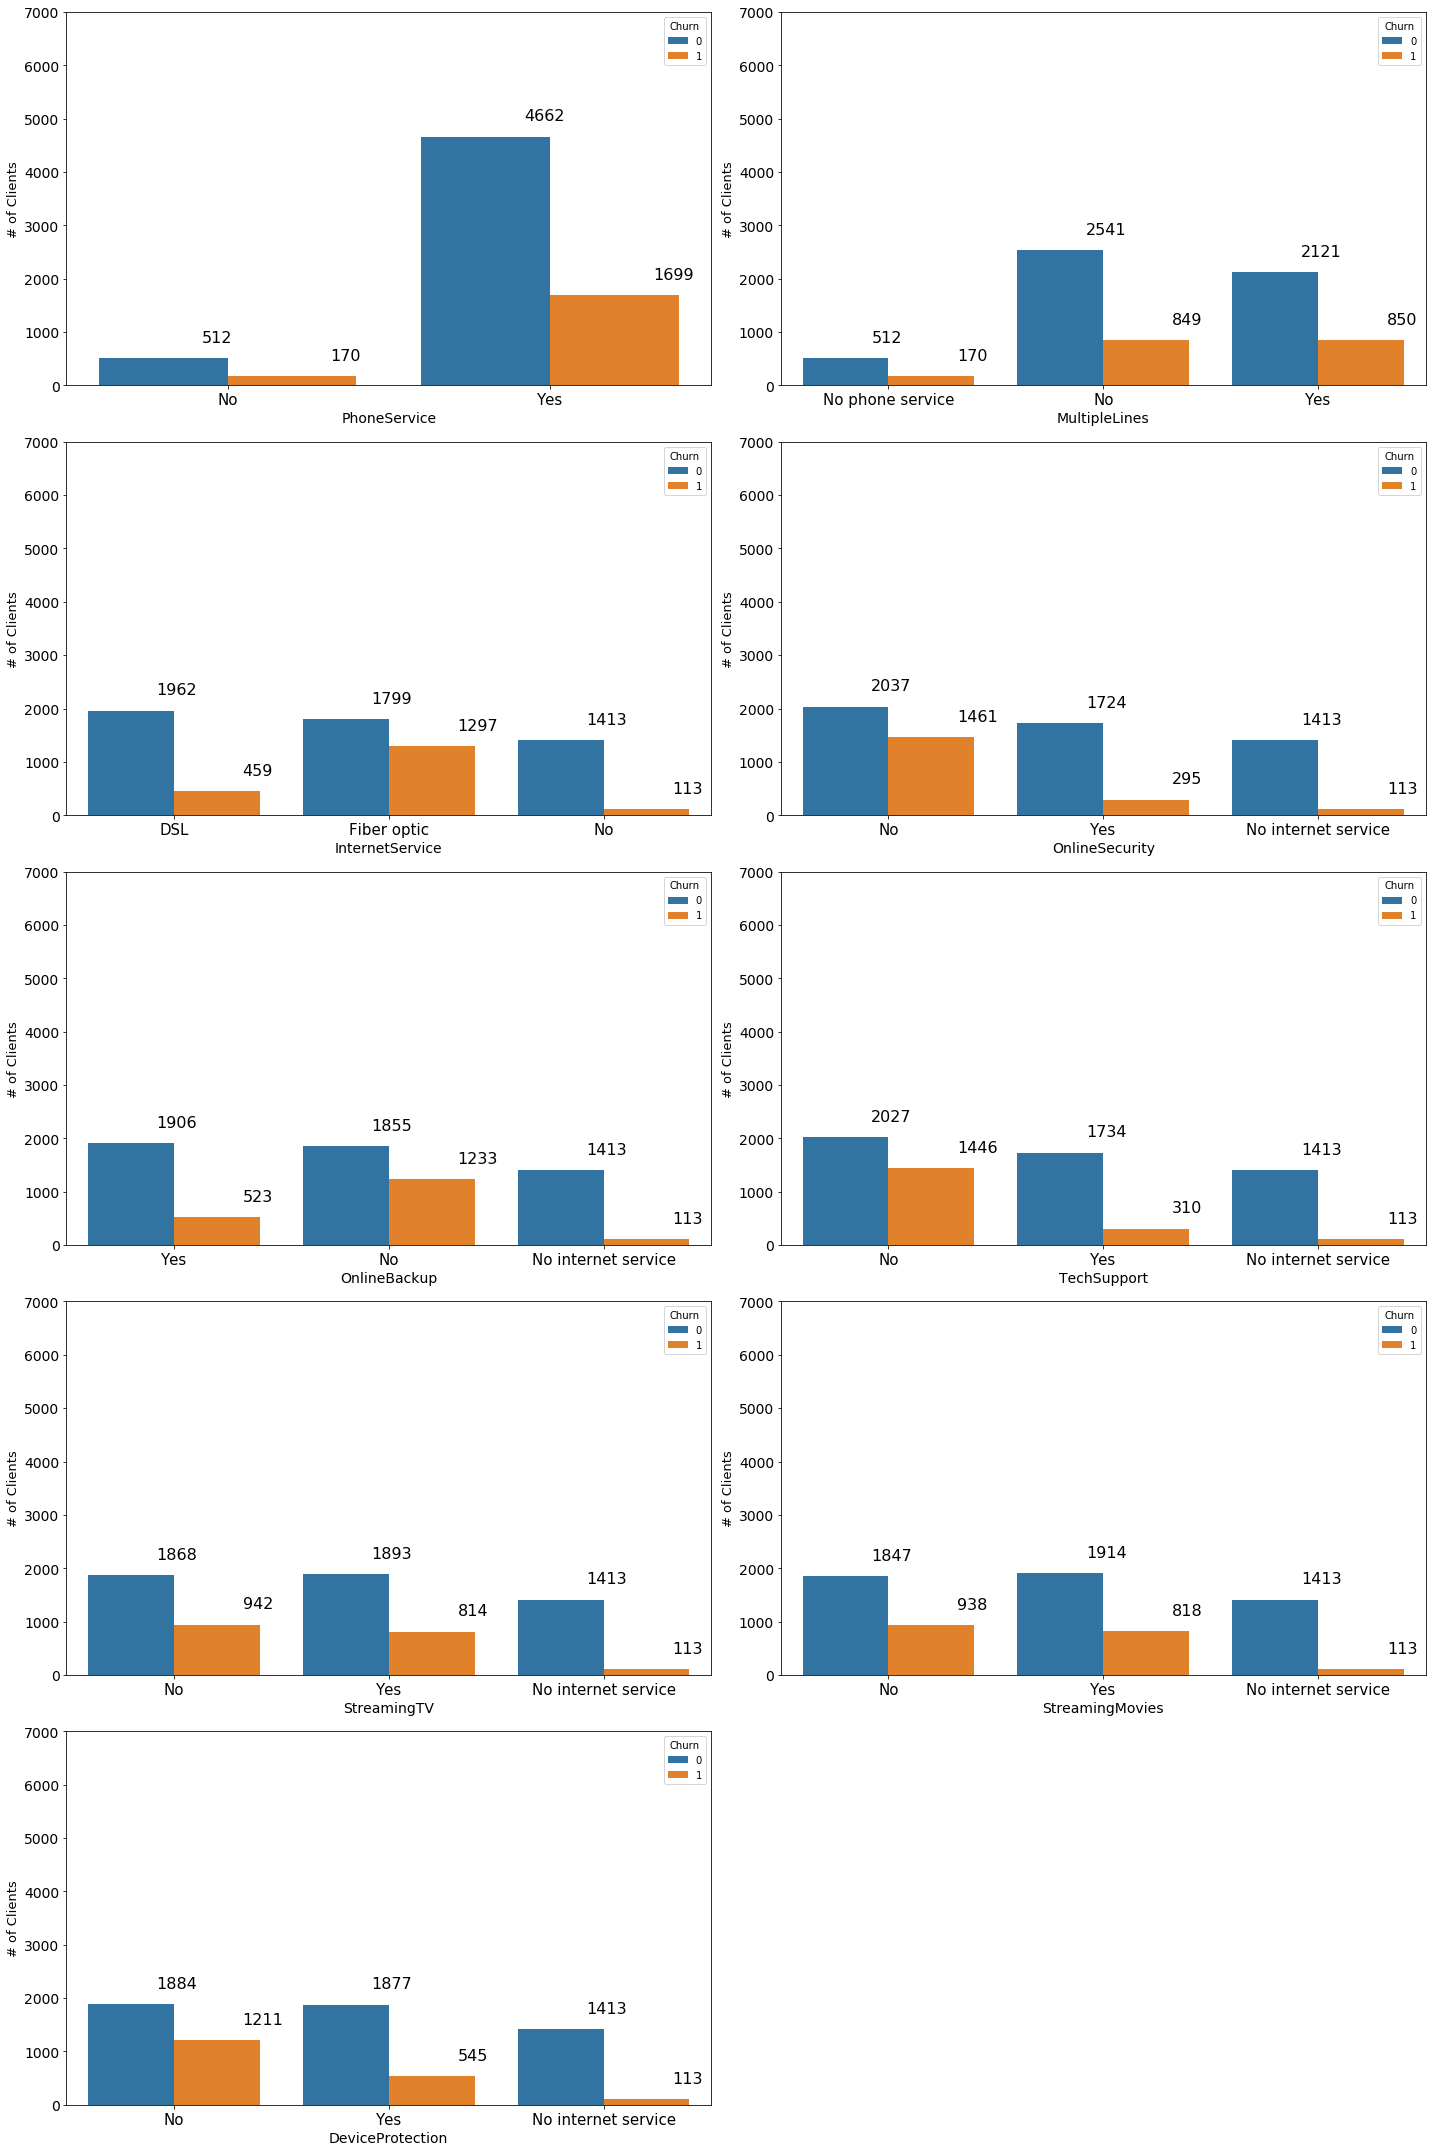

In [26]:
plt.figure(figsize=(20,30))

for i,col in enumerate(services_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(x=col,hue="Churn",data=churn_data)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 16)

plt.tight_layout()

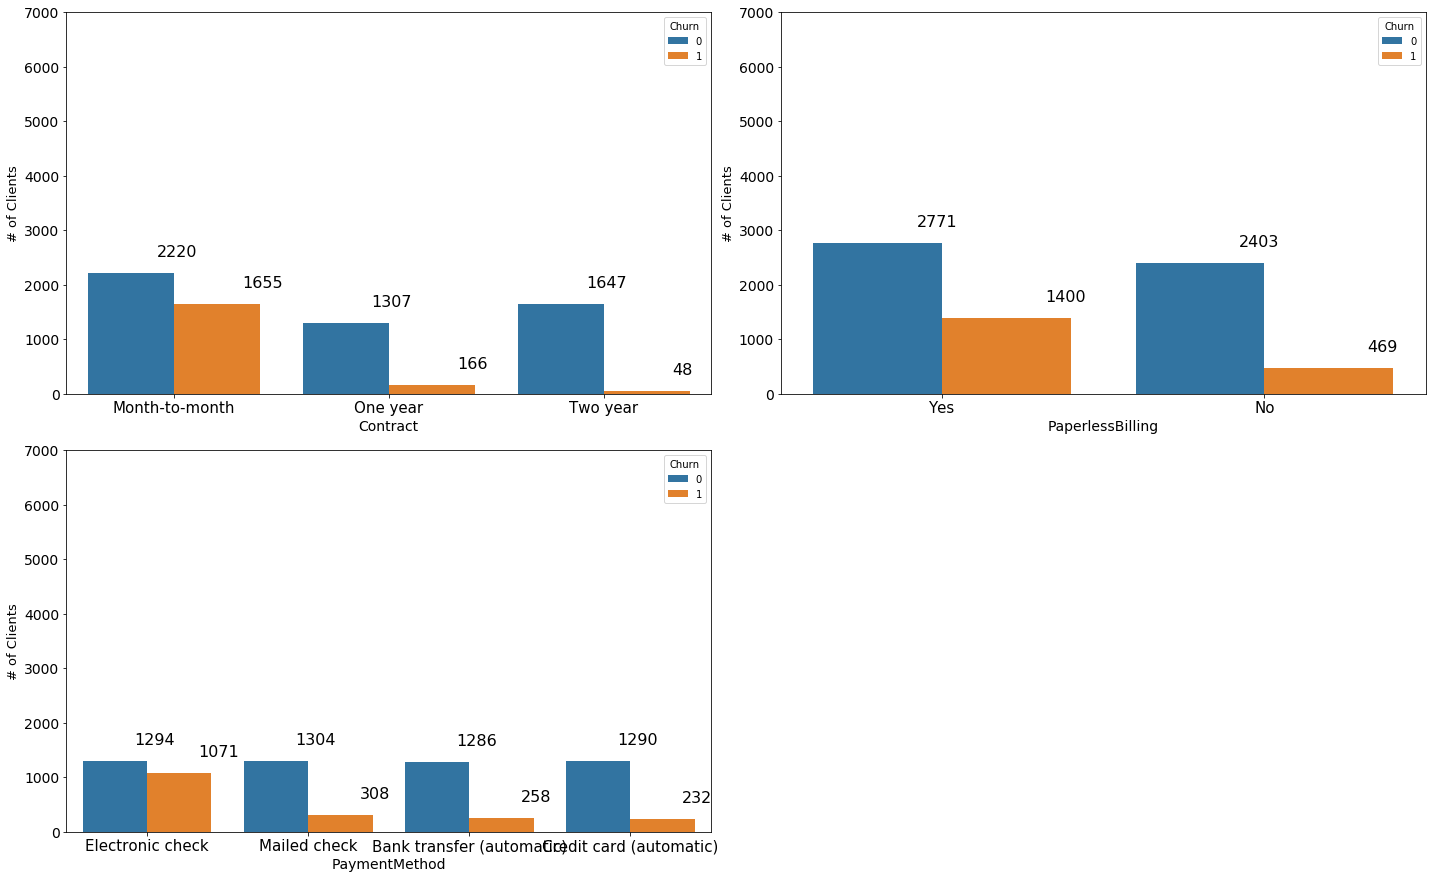

In [46]:
plt.figure(figsize=(20,30))

for i,col in enumerate(paymentmethod_Accountinfo):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(x=col,hue="Churn",data=churn_data)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 16)

plt.tight_layout()

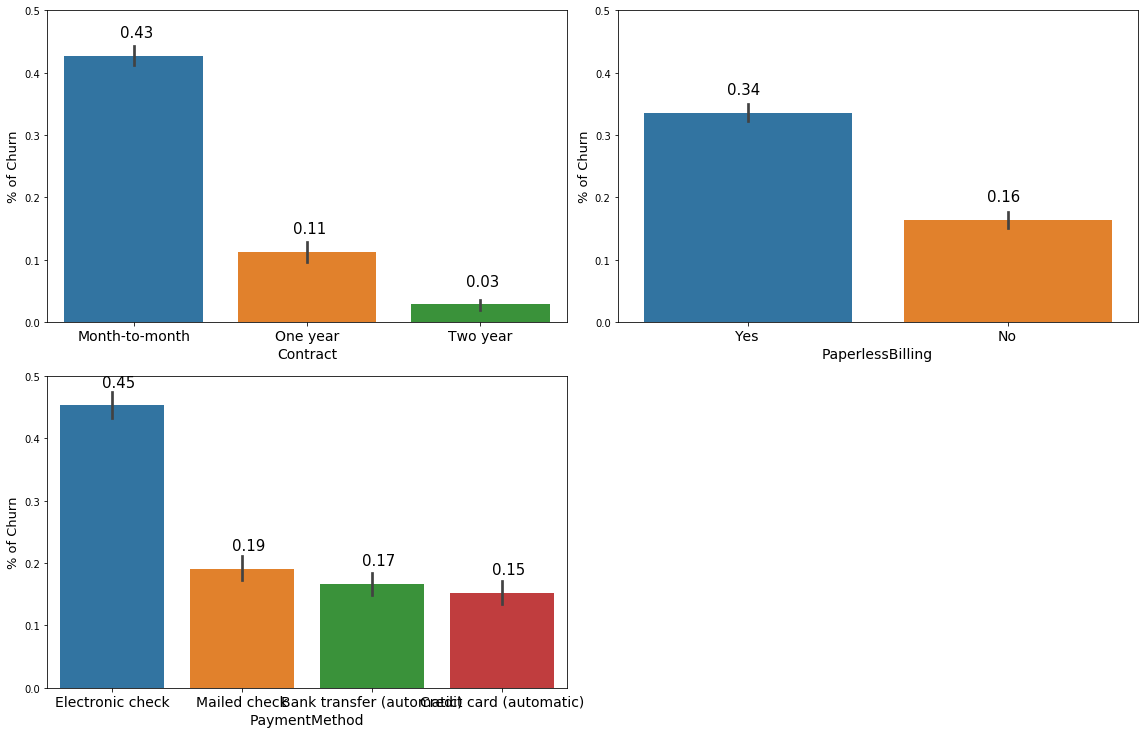

In [49]:
plt.figure(figsize=(16,25))

for i,col in enumerate(paymentmethod_Accountinfo):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.barplot(x=col, y = "Churn", data = churn_data)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("% of Churn", fontsize= 13)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.32, p.get_height()+0.03),fontsize=15)
    

plt.tight_layout()

plt.show()

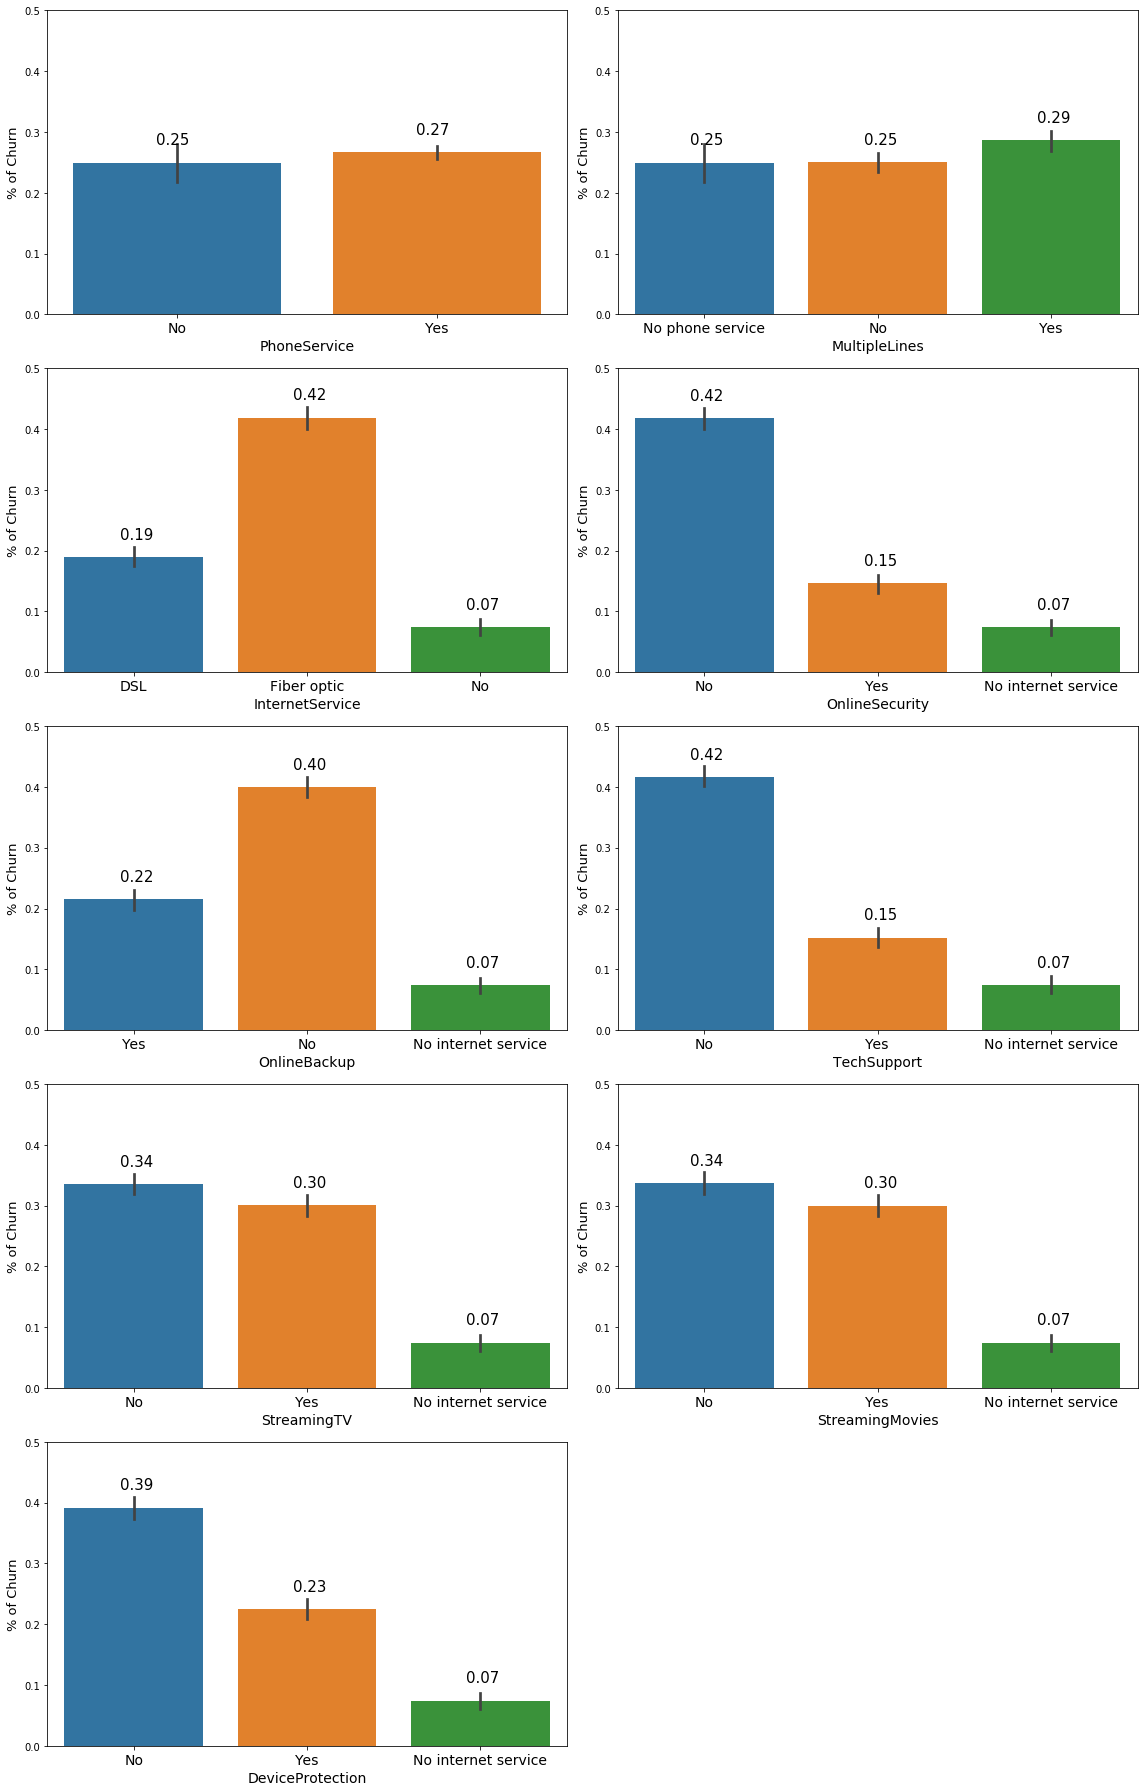

In [47]:
plt.figure(figsize=(16,25))

for i,col in enumerate(services_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.barplot(x=col, y = "Churn", data = churn_data)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("% of Churn", fontsize= 13)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.32, p.get_height()+0.03),fontsize=15)
    

plt.tight_layout()

plt.show()

In [29]:
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
x=churn_data.drop('Churn',axis=1)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [31]:
y=churn_data['Churn']

In [32]:
x.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [33]:
cat_col=[]
for columns in x.select_dtypes('object').columns:
    cat_col.append(columns)
    
print(cat_col)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


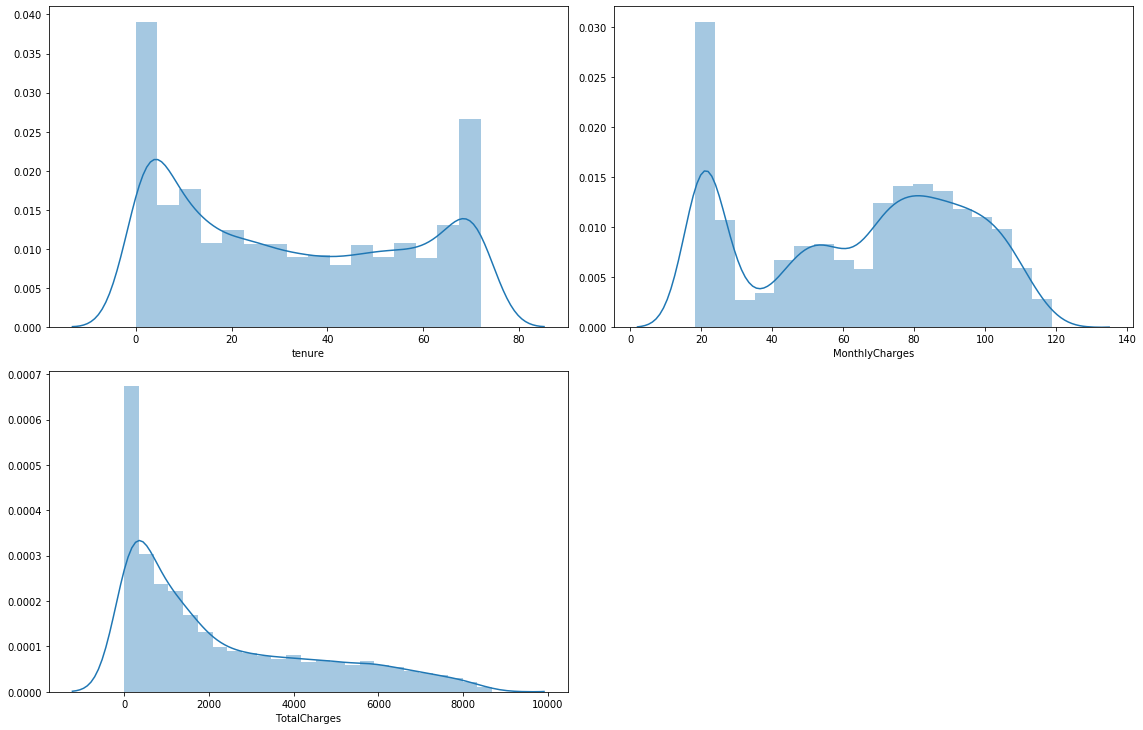

In [37]:
plt.figure(figsize=(16,25))
for i,col in enumerate(Numerical_Accountinfo):    
    
    plt.subplot(5,2,i + 1)
    
    sns.distplot(churn_data.loc[:,col])
    
    #ax = sns.barplot(x=col, y = "Churn", data = churn_data)

    
plt.tight_layout()

plt.show()

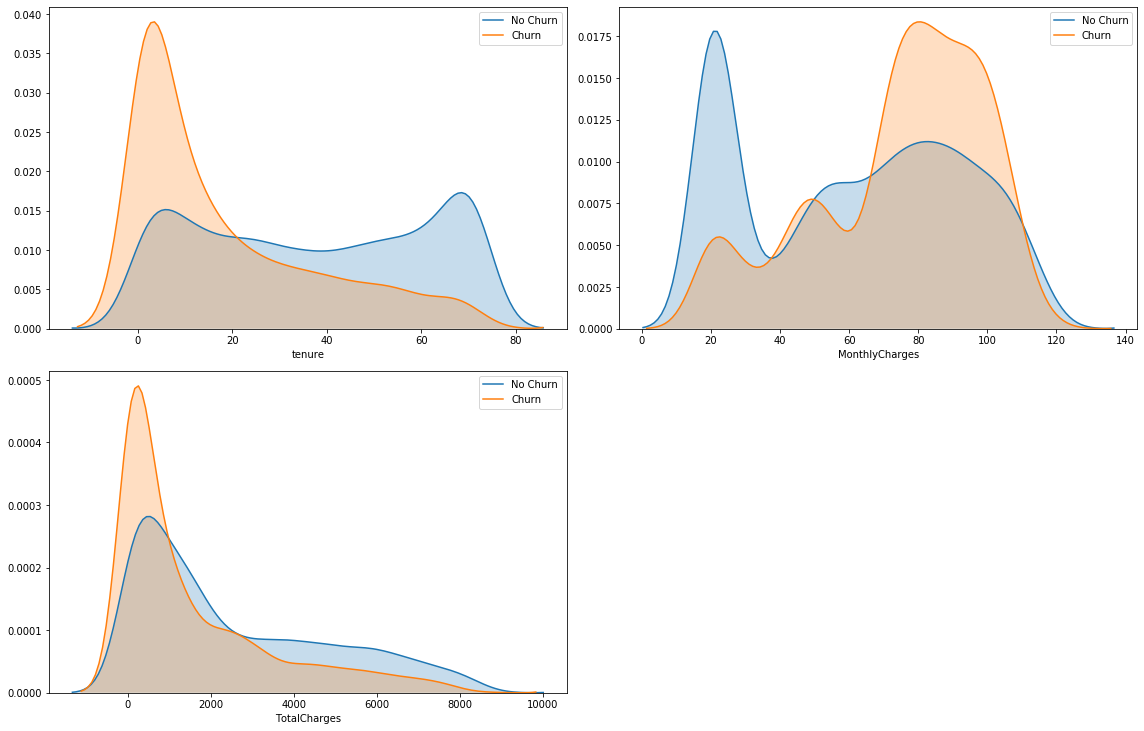

In [38]:
plt.figure(figsize=(16,25))
for i,col in enumerate(Numerical_Accountinfo):    
    
    plt.subplot(5,2,i + 1)
    
    #sns.kdeplot(data=churn_data,x="col",hue="Churn")
    sns.kdeplot(churn_data.loc[(churn_data['Churn'] == 0), col], label = 'No Churn', shade = True)
    sns.kdeplot(churn_data.loc[(churn_data['Churn'] == 1), col], label = 'Churn', shade = True)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('')
    
    #ax = sns.barplot(x=col, y = "Churn", data = churn_data)

    
plt.tight_layout()

plt.show()

In [50]:
multi_cat=[]
Binary_cat=[]
for columns in x.select_dtypes('object').columns:
    #print(columns,": \n")
    if (x[columns].nunique() > 2):
        multi_cat.append(columns)
    else: 
        Binary_cat.append(columns)
          
print(Binary_cat)  
print(multi_cat)     

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [52]:
le = LabelEncoder()
for i in Binary_cat:
  x[i] = le.fit_transform(x[i])
  print(i, '\n', np.unique(x[i].values))

gender 
 [0 1]
SeniorCitizen 
 [0 1]
Partner 
 [0 1]
Dependents 
 [0 1]
PhoneService 
 [0 1]
PaperlessBilling 
 [0 1]


In [54]:
x_new = pd.get_dummies(x, columns=multi_cat)
x_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,0,...,1,0,0,1,0,0,0,0,0,1
